MODEL COEFFICIENTS:
  enginesize:    4523.40
  horsepower:    1694.22
     citympg:    -392.57
  highwaympg:    -816.36
   Intercept:  13223.41

MODEL PERFORMANCE:
Mean squared error= 16471505.90004215
Root mean squared error= 4058.510305523709
R-squared= 0.7913520781370976


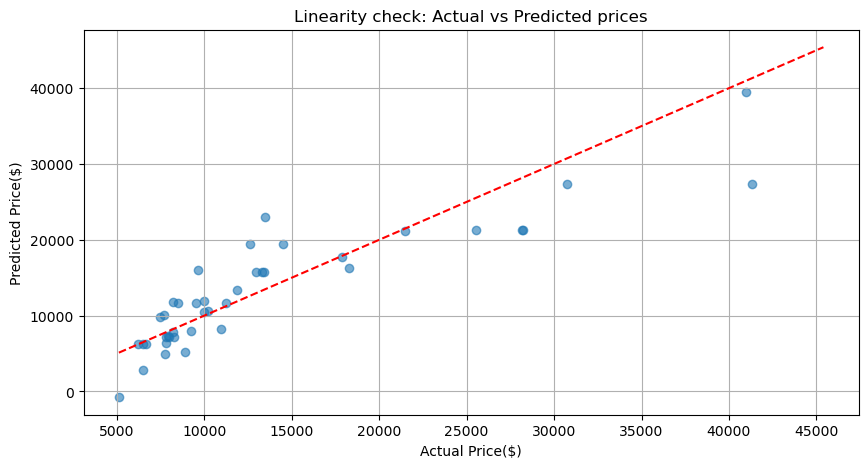


Durbin-Watson Statistic:2.28 
(Values close to 2 indicate no autocorrelation)


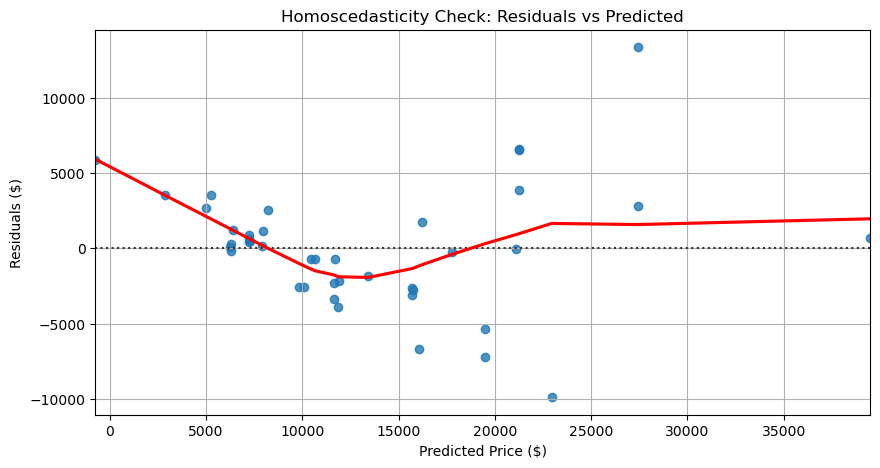

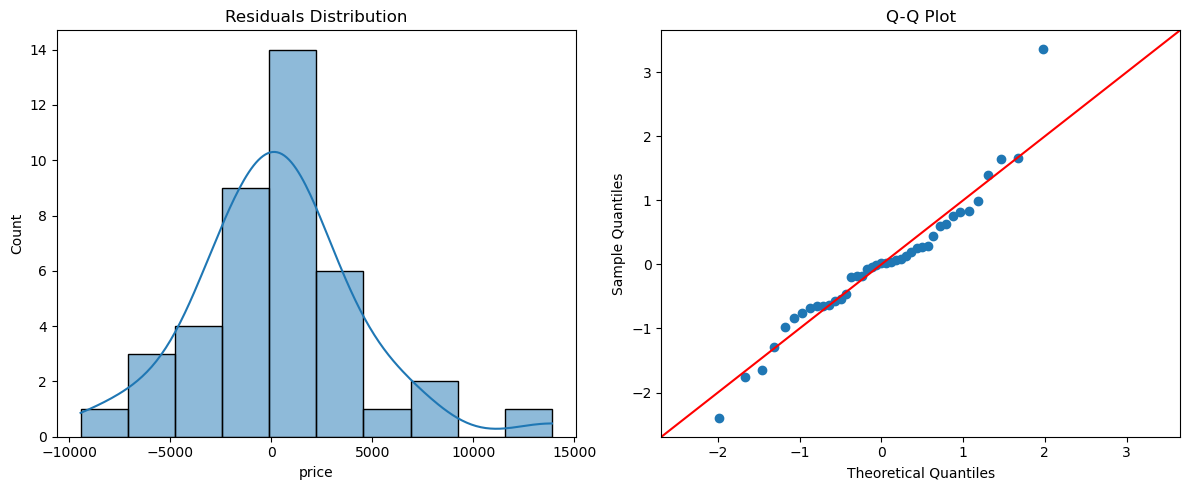

In [2]:

import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
df=pd.read_csv('CarPrice_Assignment.csv')
x=df[['enginesize','horsepower','citympg','highwaympg']]
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
model=LinearRegression()
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)
print("="*50)
print("MODEL COEFFICIENTS:")
for feature, coef in zip(x.columns, model.coef_):
    print(f"{feature:>12}: {coef:>10.2f}")
print(f"{'Intercept':>12}:{model.intercept_:>10.2f}")
print("="*50)

print("\nMODEL PERFORMANCE:")
mse=mean_squared_error(y_test, y_pred)
print('Mean squared error=',mse)
rmse=np.sqrt(mse)
print('Root mean squared error=',rmse)
r2score=r2_score(y_test, y_pred)
print('R-squared=',r2score)

# 1. Linearity check
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(),y.max()],[y.min(),y.max()],'r--')
plt.title("Linearity check: Actual vs Predicted prices")
plt.xlabel("Actual Price($)")
plt.ylabel("Predicted Price($)")
plt.grid(True)
plt.show()

# 2. Independence (Durbin-Watson)
residuals=y_test-y_pred
dw_test=sm.stats.durbin_watson(residuals)
print(f"\nDurbin-Watson Statistic:{dw_test:.2f}","\n(Values close to 2 indicate no autocorrelation)")

# 3. Homoscedasticity
plt.figure(figsize=(10,5))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color':'red'})
plt.title("Homoscedasticity Check: Residuals vs Predicted")
plt.xlabel("Predicted Price ($)")
plt.ylabel("Residuals ($)")
plt.grid(True)
plt.show()

# 4. Normality of residuals
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.histplot(residuals, kde=True, ax=ax1)
ax1.set_title("Residuals Distribution")
sm.qqplot(residuals, line='45', fit=True, ax=ax2)
ax2.set_title("Q-Q Plot")
plt.tight_layout()
plt.show()
